Importações

## 1. Configuração do Ambiente e Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drivers da Satisfação de Passageiros

---

## Resumo Executivo e Contexto do Projeto

A satisfação do cliente é uma métrica crucial para o sucesso e a sustentabilidade de qualquer companhia aérea, impactando diretamente a fidelidade do cliente, a reputação da marca e a receita. Análises superficiais geralmente se concentram em notas de satisfação gerais, mas não revelam as causas profundas da insatisfação ou do contentamento dos passageiros.

Este projeto tem como objetivo ir além, utilizando uma abordagem de análise exploratória de dados para identificar os principais fatores (drivers) que realmente impulsionam a percepção de valor e a satisfação geral dos clientes.

Para esta análise, foi utilizado um dataset público do Kaggle com mais de 100.000 avaliações detalhadas de passageiros. O conjunto de dados abrange uma vasta gama de variáveis, incluindo dados demográficos, detalhes da viagem (classe, distância) e avaliações específicas para múltiplos serviços a bordo.

## 2. Carregamento e Preparação dos Dados
### 2.1. Carregamento do Dataset

A primeira etapa consiste em garantir que o conjunto de dados esteja limpo, consistente e pronto para a investigação.
Nesta seção, foram realizadas as seguintes etapas de preparação:

* **Carregamento do Dataset:** Os dados foram carregados em um DataFrame do Pandas. A coluna original de índice (`Unnamed: 0`) foi removida no momento da importação para manter o dataset limpo.
* **Tradução e Padronização:** Para facilitar a manipulação e a legibilidade do código, todas as colunas foram renomeadas do inglês para o português. Da mesma forma, os valores dentro das principais colunas categóricas foram traduzidos.
* **Tratamento de Valores Nulos:** Foi realizada uma verificação de dados ausentes, que identificou 310 valores nulos na coluna `atraso_chegada_minutos`. Com base na hipótese de que a ausência de registro significa ausência de atraso, esses valores foram preenchidos com 0.

In [2]:
# Carrega o dataset, definindo a primeira coluna como índice para evitar a coluna 'Unnamed: 0'
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv', index_col=0)

# Exibe todas as colunas originais
print(df.columns)

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


### 2.2. Tradução e Padronização dos Nomes e Valores

In [3]:
# Traduz as colunas
traducao_colunas = {
    'id': 'id_passageiro', 'Gender': 'genero', 'Customer Type': 'tipo_cliente', 'Age': 'idade',
    'Type of Travel': 'tipo_viagem', 'Class': 'classe', 'Flight Distance': 'distancia_voo',
    'Inflight wifi service': 'servico_wifi_bordo',
    'Departure/Arrival time convenient': 'horario_conveniente_partida_chegada',
    'Ease of Online booking': 'facilidade_reserva_online', 'Gate location': 'local_portao_embarque',
    'Food and drink': 'comida_bebida', 'Online boarding': 'embarque_online',
    'Seat comfort': 'conforto_assento', 'Inflight entertainment': 'entretenimento_bordo',
    'On-board service': 'servico_de_bordo', 'Leg room service': 'espaco_pernas',
    'Baggage handling': 'manuseio_bagagem', 'Checkin service': 'servico_checkin',
    'Inflight service': 'servico_durante_voo', 'Cleanliness': 'limpeza',
    'Departure Delay in Minutes': 'atraso_partida_minutos',
    'Arrival Delay in Minutes': 'atraso_chegada_minutos', 'satisfaction': 'satisfacao'
}
df.rename(columns=traducao_colunas, inplace=True)

# Traduz os valores categóricos
df['genero'] = df['genero'].map({'Male': 'Masculino', 'Female': 'Feminino'})
df['tipo_cliente'] = df['tipo_cliente'].map({'Loyal Customer': 'Cliente_fidelizado', 'disloyal Customer': 'Cliente_nao_fidelizado'})
df['tipo_viagem'] = df['tipo_viagem'].map({'Business travel': 'Viagem_negocios', 'Personal Travel': 'Viagem_pessoal'})
df['classe'] = df['classe'].map({'Business': 'Executiva', 'Eco': 'Economica', 'Eco Plus': 'Economica_plus'})
df['satisfacao'] = df['satisfacao'].map({'satisfied': 'Satisfeito', 'neutral or dissatisfied': 'Neutro_ou_insatisfeito'})

### 2.3. Verificação da Estrutura Pós-Tratamento

In [4]:
# Exibe as 5 primeiras linhas para entender a estrutura
print(df.head())

   id_passageiro     genero            tipo_cliente  idade      tipo_viagem  \
0          70172  Masculino      Cliente_fidelizado     13   Viagem_pessoal   
1           5047  Masculino  Cliente_nao_fidelizado     25  Viagem_negocios   
2         110028   Feminino      Cliente_fidelizado     26  Viagem_negocios   
3          24026   Feminino      Cliente_fidelizado     25  Viagem_negocios   
4         119299  Masculino      Cliente_fidelizado     61  Viagem_negocios   

           classe  distancia_voo  servico_wifi_bordo  \
0  Economica_plus            460                   3   
1       Executiva            235                   3   
2       Executiva           1142                   2   
3       Executiva            562                   2   
4       Executiva            214                   3   

   horario_conveniente_partida_chegada  facilidade_reserva_online  ...  \
0                                    4                          3  ...   
1                                    2  

In [5]:
# Verifica os tipos de dados e se há valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id_passageiro                        103904 non-null  int64  
 1   genero                               103904 non-null  object 
 2   tipo_cliente                         103904 non-null  object 
 3   idade                                103904 non-null  int64  
 4   tipo_viagem                          103904 non-null  object 
 5   classe                               103904 non-null  object 
 6   distancia_voo                        103904 non-null  int64  
 7   servico_wifi_bordo                   103904 non-null  int64  
 8   horario_conveniente_partida_chegada  103904 non-null  int64  
 9   facilidade_reserva_online            103904 non-null  int64  
 10  local_portao_embarque                103904 non-null  int64  
 11  comida_bebida     

### 2.4. Tratamento de Valores Nulos

In [6]:
# Preenche os valores nulos
df['atraso_chegada_minutos'] = df['atraso_chegada_minutos'].fillna(0)

# Verifica se a limpeza foi bem-sucedida
print("Valores nulos restantes na coluna após o tratamento:")
print(df['atraso_chegada_minutos'].isnull().sum())

Valores nulos restantes na coluna após o tratamento:
0


## 3. Análise Exploratória de Dados (EDA)

Com os dados limpos e preparados, é iniciado a Análise Exploratória. O objetivo desta fase é obter uma primeira compreensão sobre o comportamento dos passageiros, identificar padrões e investigar relações iniciais entre as variáveis.

Por meio de visualizações gráficas, buscarei responder às seguintes perguntas iniciais:

* Qual é a proporção geral de passageiros satisfeitos e insatisfeitos na base de dados?
* A fidelidade do cliente (`tipo_cliente`) tem uma aparente correlação com o nível de satisfação?
* O propósito da viagem (`tipo_viagem`) impacta a avaliação que o passageiro faz da companhia? A resposta a esta pergunta será o ponto de partida para uma investigação mais aprofundada nas seções seguintes.

### 3.1. Distribuição Geral da Satisfação

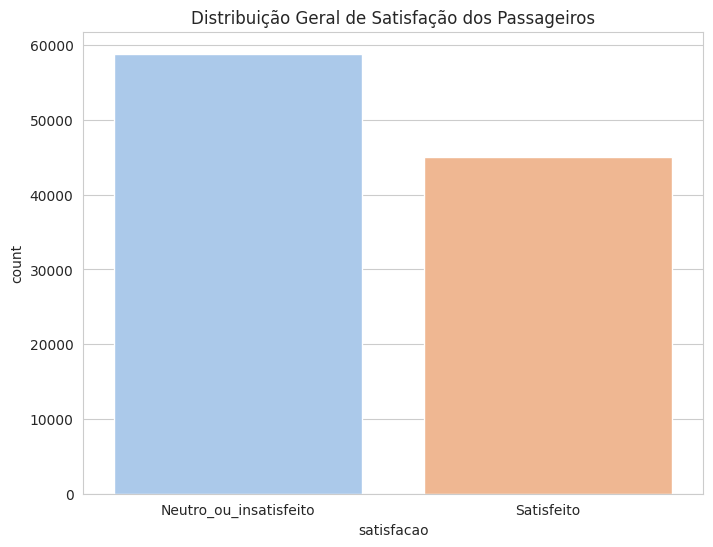

In [7]:
# Define um estilo e paleta de cores para os gráficos
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Cria um gráfico de contagem para a coluna 'satisfacao'
plt.figure(figsize=(8, 6)) # Cria a figura
sns.countplot(x='satisfacao', data=df) # Desenha o gráfico
plt.title('Distribuição Geral de Satisfação dos Passageiros') # Adiciona o título
plt.show() # Exibe o resultado final

In [8]:
# Comando para obter os números exatos
print(df['satisfacao'].value_counts())

# Comando para obter as porcentagens
print(df['satisfacao'].value_counts(normalize=True) * 100)

satisfacao
Neutro_ou_insatisfeito    58879
Satisfeito                45025
Name: count, dtype: int64
satisfacao
Neutro_ou_insatisfeito    56.666731
Satisfeito                43.333269
Name: proportion, dtype: float64


O primeiro gráfico dá uma visão geral da base de clientes. Observa-se uma divisão relativamente equilibrada, com uma leve predominância de passageiros neutros ou insatisfeitos.

Em números exatos, a distribuição é a seguinte:

* **Neutro ou Insatisfeito:** 58.879 passageiros (56.67%)
* **Satisfeito:** 45.025 passageiros (43.33%)

Este resultado inicial indica que, embora uma parcela significativa dos clientes esteja satisfeita, há uma grande oportunidade para a companhia aérea melhorar a experiência e converter o grupo majoritário. As análises seguintes buscarão entender se existem perfis de clientes específicos onde essa satisfação ou insatisfação é mais acentuada.

### 3.2. Satisfação por Tipo de Cliente (Fidelidade)

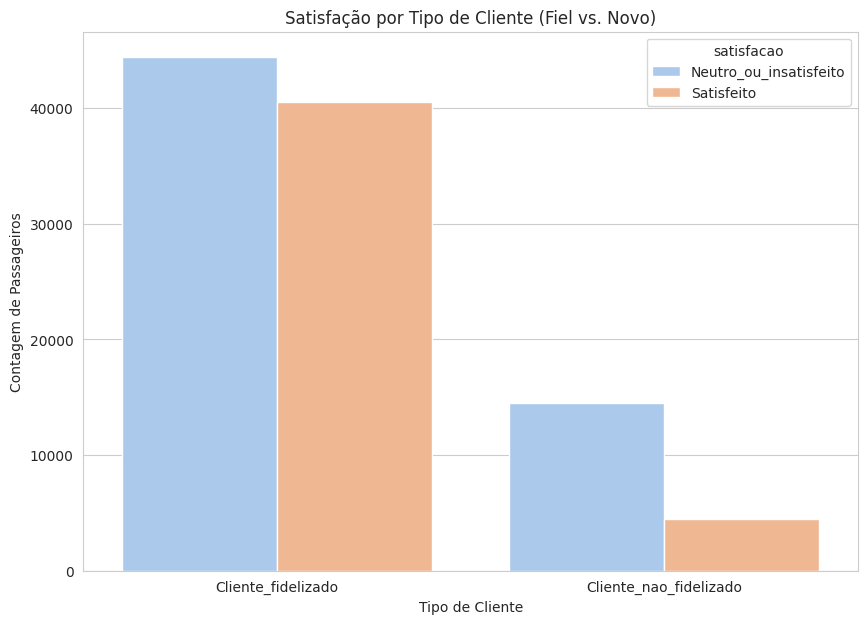

In [9]:
# Cria um gráfico de contagem mostrando a satisfação por tipo de cliente
plt.figure(figsize=(10, 7))
sns.countplot(x='tipo_cliente', hue='satisfacao', data=df)
plt.title('Satisfação por Tipo de Cliente (Fiel vs. Novo)')
plt.xlabel('Tipo de Cliente') # Adicionando rótulo ao eixo X
plt.ylabel('Contagem de Passageiros') # Adicionando rótulo ao eixo Y
plt.show()

Aprofundando a análise, o gráfico acima segmenta a satisfação pelo **tipo de cliente**, diferenciando entre clientes fidelizados (`Loyal Customer`) e novos clientes.

O grupo de Clientes Fidelizados é, de longe, o maior grupo de passageiros. Dentro dele, o nível de satisfação é consideravelmente mais alto. Embora ainda exista um número relevante de clientes insatisfeitos, a proporção entre satisfeitos e insatisfeitos é muito mais equilibrada, com uma leve vantagem para os satisfeitos.
Já no grupo de Clientes Não Fidelizados, sendo o segmento menor, a **insatisfação é drasticamente predominante**. Isso sugere que a primeira experiência do cliente com a companhia aérea é um momento crítico, com um alto índice de atrito e percepção negativa do serviço.

Essa alta taxa de insatisfação pode ser atribuída à sensibilidade da **primeira impressão**. Um novo cliente não possui um "histórico de confiança" ou um relacionamento estabelecido com a companhia. Portanto, qualquer ponto de atrito — seja na reserva, no check-in ou durante o voo — tem um peso muito maior, pois não há experiências positivas anteriores para contrabalancear. Além disso, as **expectativas** são formadas por fatores externos, como o preço e o marketing. Se a experiência real não atinge esse limiar mínimo esperado, a percepção negativa é imediata e pode definir a visão do cliente sobre a marca a longo prazo.

Este insight reforça a importância das estratégias de fidelização. Clientes que mantêm um relacionamento com a companhia aérea têm uma percepção geral melhor do serviço. A questão que surge a partir daqui é: o que impulsiona essa diferença? O propósito da viagem seria um fator ainda mais decisivo? A próxima análise investigará essa relação.

### 3.3. Satisfação por Propósito da Viagem

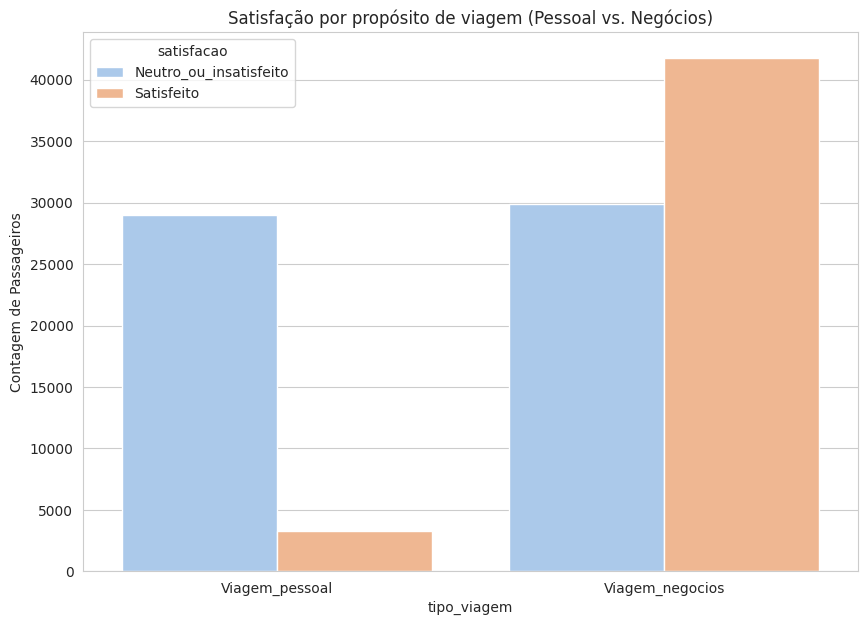

In [10]:
# Cria um gráfico de contagem mostrando a satisfação por propósito de viagem
plt.figure(figsize=(10, 7))
sns.countplot(x='tipo_viagem', hue='satisfacao', data=df)
plt.title('Satisfação por propósito de viagem (Pessoal vs. Negócios)')
plt.xlabel('tipo_viagem') # Adicionando rótulo ao eixo X
plt.ylabel('Contagem de Passageiros') # Adicionando rótulo ao eixo Y
plt.show()

A análise final desta seção exploratória investiga a relação entre o **propósito da viagem** e a satisfação do cliente. O resultado deste gráfico é o insight mais expressivo encontrado até agora e o principal motivador para a análise aprofundada que se segue.

A diferença entre os dois grupos é notável:

* **Viagem de Negócios:** Neste segmento, há uma clara predominância de **passageiros satisfeitos**. A experiência de voar a trabalho parece estar consistentemente alinhada ou até superando as expectativas da maioria desses clientes.
* **Viagem Pessoal:** O cenário se inverte completamente. Passageiros voando a lazer demonstram um nível de **insatisfação majoritário** e expressivo.

A discrepância na satisfação não é sutil, é drástica. Isso levanta a principal questão a ser investigada na próxima seção: **O que explica essa enorme diferença de percepção entre os dois grupos?** A próxima etapa de "Análise Aprofundada" irá testar a hipótese de que a classe do voo seja o principal fator por trás desse resultado.

## 4. Análise Aprofundada (Deep Dive) das Hipóteses
### 4.1. Análise Cruzada: Satisfação por Classe e Tipo de Viagem

O objetivo desta seção é ir além da simples observação e testar hipóteses que possam explicar o **"porquê"** por trás desse padrão.

A principal hipótese inicial é que a **classe do voo** seja o driver mais forte para essa diferença, uma vez que viajantes a negócio historicamente têm maior probabilidade de voar em classes superiores (Executiva). As análises a seguir irão investigar essa suposição, cruzando as avaliações de satisfação com o propósito da viagem e a classe do voo.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


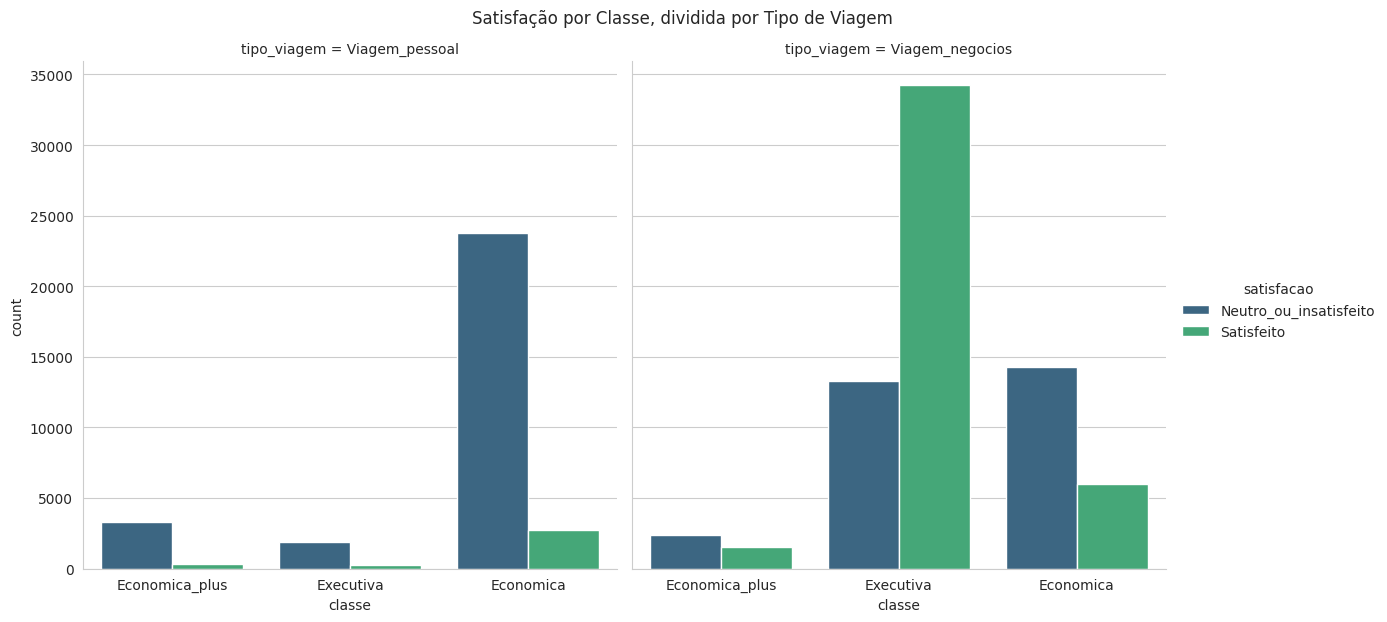

In [11]:
# Cria duas colunas: uma para 'Viagem de Negócios' e outra para 'Viagem Pessoal'
# Em cada uma, mostra a contagem de satisfação por classe de voo
sns.catplot(data=df, x='classe', col='tipo_viagem', hue='satisfacao', kind='count', palette='viridis', height=6)
plt.suptitle('Satisfação por Classe, dividida por Tipo de Viagem', y=1.03)
plt.show()

A análise cruzada confirma parcialmente a hipótese inicial. Fica claro que a grande maioria dos passageiros em **Viagem de Negócios** voa na Classe Executiva e, nesse segmento, o nível de satisfação é altíssimo. Isso explica uma parte significativa da satisfação geral desse grupo.

No entanto, o gráfico revela um insight muito mais profundo e contraintuitivo ao analisarmos o grupo de **Viagem Pessoal**. Mesmo quando isolamos os passageiros que voaram na **Classe Executiva**, a maioria ainda se declara **'Neutra ou Insatisfeita'**.

Esta observação é crucial, pois mostra que a classe do voo, embora seja um fator importante, **não é a única explicação** para a diferença de satisfação. Existe outro fator, provavelmente ligado à **percepção de valor e às expectativas do cliente**, que faz com que um passageiro a lazer em uma cabine premium tenha uma percepção de experiência pior do que um passageiro a negócios no mesmo assento.

Para entender quais são os pontos de atrito específicos, a próxima etapa irá aprofundar a análise nas notas de cada serviço, separadamente para a Classe Executiva e a Classe Econômica.

### 4.2. Investigação dos Drivers de Satisfação na Classe Executiva

Analisando 49665 passageiros da Classe Executiva.


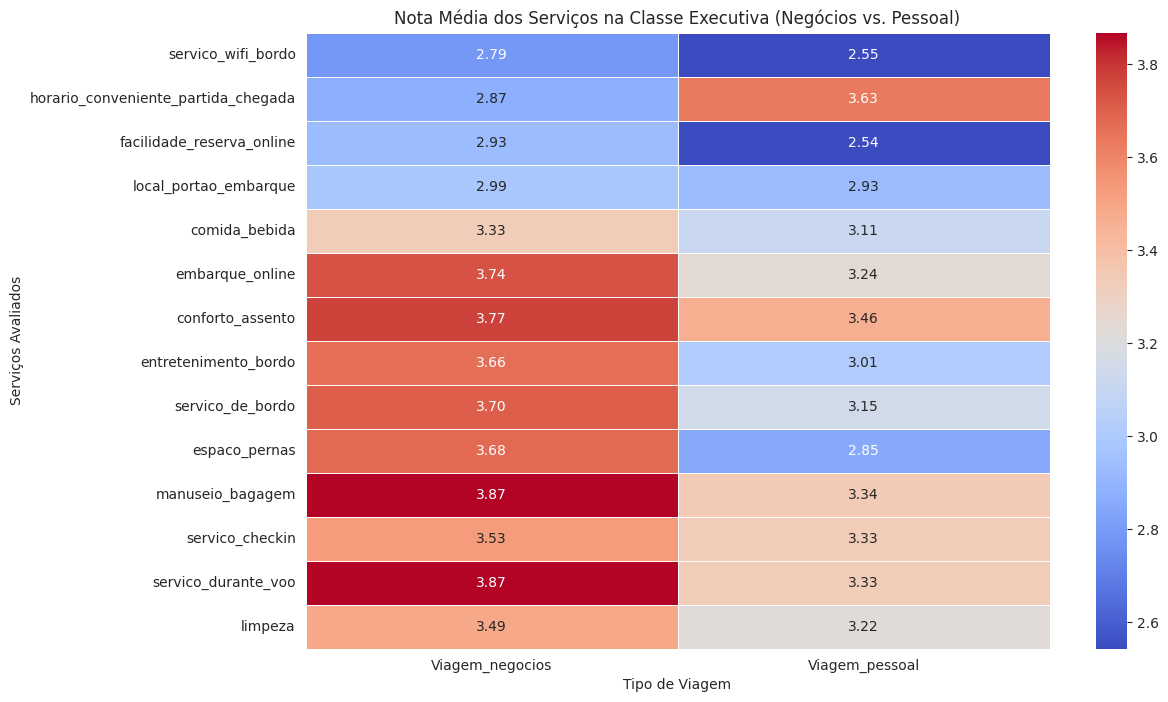

In [12]:
servicos_pt_corrigido = [
    'servico_wifi_bordo', 'horario_conveniente_partida_chegada', 'facilidade_reserva_online',
    'local_portao_embarque', 'comida_bebida', 'embarque_online', 'conforto_assento',
    'entretenimento_bordo', 'servico_de_bordo', 'espaco_pernas',
    'manuseio_bagagem', 'servico_checkin', 'servico_durante_voo', 'limpeza'
]


# Cria um novo DataFrame contendo APENAS passageiros da Classe Executiva
df_executiva = df[df['classe'] == 'Executiva'].copy()
print(f"Analisando {len(df_executiva)} passageiros da Classe Executiva.")

# Agrupa e calcula a média
media_servicos_executiva = df_executiva.groupby('tipo_viagem')[servicos_pt_corrigido].mean().T


# Cria o heatmap para visualizar a diferença
plt.figure(figsize=(12, 8))
sns.heatmap(media_servicos_executiva, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Nota Média dos Serviços na Classe Executiva (Negócios vs. Pessoal)')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Serviços Avaliados')
plt.show()


Para testar a hipótese da "percepção de valor", esta análise foca exclusivamente nos passageiros da **Classe Executiva**. O heatmap acima compara a nota média dada para cada serviço, segmentando entre os dois tipos de viagem.

O resultado é conclusivo: em **absolutamente todos os serviços**, passageiros em viagem de negócio deram notas médias superiores às dos passageiros em viagem pessoal. Isso reforça a ideia de que o cliente a lazer é inerentemente mais crítico, mesmo ao experimentar o produto premium da companhia.

As maiores diferenças de percepção podem ser notadas em serviços como `servico_wifi_bordo`, `entretenimento_bordo` e `facilidade_reserva_online`. Para um cliente que pagou um alto valor pelo bilhete, falhas em itens de conveniência ou entretenimento podem gerar uma frustração desproporcional, pois a expectativa é de uma experiência perfeita e sem atritos.

Esta análise solidifica a hipótese de que as **expectativas elevadas** do viajante a lazer na Classe Executiva são um driver chave para sua menor satisfação. Para completar o estudo, a análise final investigará se este comportamento se repete na Classe Econômica.

### 4.3. Investigação dos Drivers de Satisfação na Classe Econômica

Analisando 46745 passageiros da Classe Econômica.


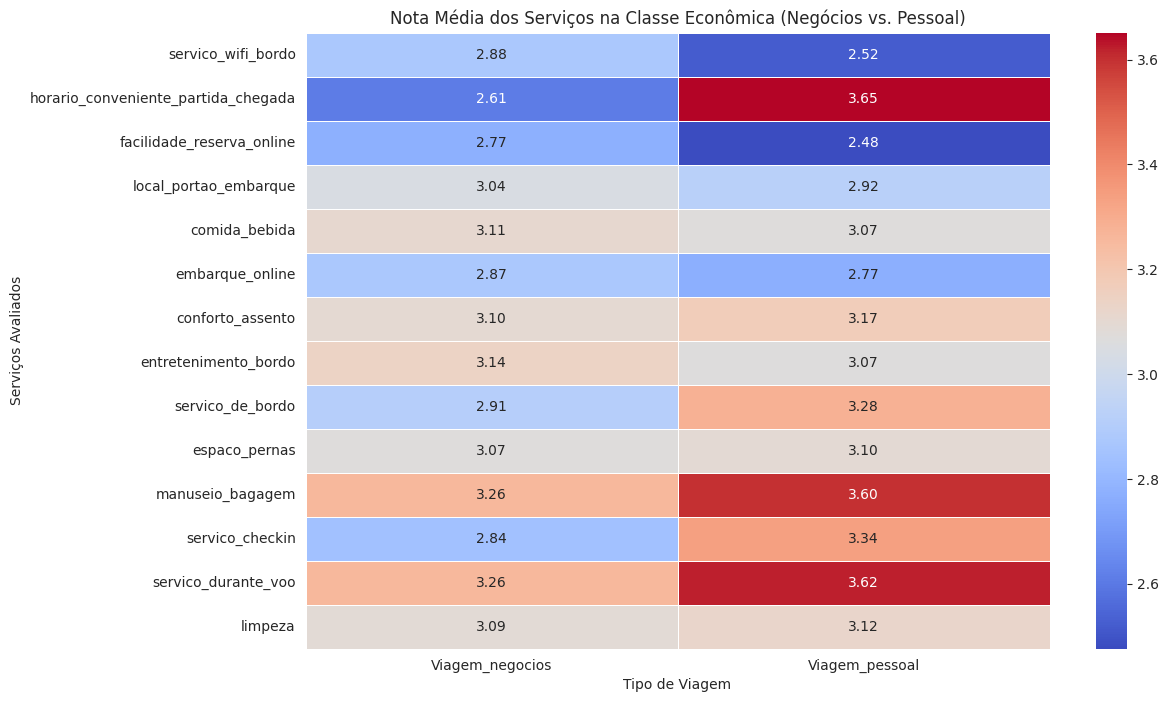

In [13]:
# Cria um DataFrame contendo APENAS passageiros da Classe Econômica
df_economica = df[df['classe'] == 'Economica'].copy()
print(f"Analisando {len(df_economica)} passageiros da Classe Econômica.")


# Agrupa por 'tipo_viagem' e calcula a média de cada serviço
media_servicos_economica = df_economica.groupby('tipo_viagem')[servicos_pt_corrigido].mean().T


# Cria o heatmap para visualizar a diferença
plt.figure(figsize=(12, 8))
sns.heatmap(media_servicos_economica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Nota Média dos Serviços na Classe Econômica (Negócios vs. Pessoal)')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Serviços Avaliados')
plt.show()

A análise final espelha a investigação anterior, mas agora focando nos passageiros da **Classe Econômica**. O objetivo é verificar se o comportamento do cliente crítico a lazer se mantém em uma classe de serviço com uma proposta de valor diferente.

O resultado, visualizado no heatmap acima, é revelador. O padrão observado na Classe Executiva não apenas desaparece, como **se inverte** em diversos serviços. Na Classe Econômica, os passageiros em **viagem pessoal dão notas médias ligeiramente superiores** às dos passageiros a negócio.

Esta inversão solidifica a tese central deste projeto: a satisfação é movida principalmente pela **relação entre a expectativa e o valor percebido**.

* **Para o cliente a lazer:** O baixo custo da passagem alinha suas expectativas a um serviço mais básico. Quando a companhia entrega esse serviço de forma funcional, a expectativa é atendida, gerando uma satisfação moderada.
* **Para o cliente a negócios:** A necessidade funcional (como trabalhar) pode ser frustrada pelo ambiente da classe econômica, e a experiência pode ser comparada com viagens anteriores em classes superiores, resultando em uma avaliação mais crítica.

Isso conclui a fase de análise dos dados, demonstrando que os "drivers" da satisfação são complexos e dependem fundamentalmente do perfil e do propósito de cada passageiro, não apenas dos serviços isoladamente.

## 5. Conclusão Final e Recomendações Estratégicas

Este projeto iniciou-se com uma pergunta ampla sobre os níveis de satisfação dos passageiros e evoluiu para uma análise aprofundada das nuances que direcionam a percepção do cliente. A jornada através dos dados revelou que a satisfação do passageiro é um fenômeno complexo, que vai muito além da qualidade isolada dos serviços oferecidos.

A principal conclusão desta análise é que o driver mais poderoso da satisfação é o **alinhamento entre a expectativa do cliente, o valor percebido (influenciado por quem paga a conta) e o propósito da viagem.**

Descobrimos o "Paradoxo da Classe Executiva", onde passageiros a lazer, apesar de estarem no melhor produto da companhia, são os mais críticos. Isso ocorre porque suas expectativas são emocionais e o alto custo pessoal da passagem eleva a régua para um padrão de perfeição. Em contrapartida, na Classe Econômica, onde as expectativas são mais funcionais e alinhadas ao baixo custo, os passageiros a lazer mostraram-se ligeiramente mais satisfeitos que os de negócio, cujas necessidades de trabalho podem ser frustradas.

Isso leva à tese final: **a satisfação não está no que a companhia aérea entrega, mas em como essa entrega se encaixa na história e na necessidade de cada cliente.**

### Recomendações de Negócio

Com base nestes insights, as seguintes ações estratégicas poderiam ser consideradas para otimizar a experiência do cliente:

* **Para o Segmento "Lazer Premium" (Classe Executiva):**
    * **Marketing:** Focar em vender a "experiência memorável", não apenas o conforto.
    * **Serviço a Bordo:** Treinar a tripulação para identificar esses passageiros (ex: casais, famílias em férias) e criar "momentos de encanto" — um drink de boas-vindas diferenciado, uma sobremesa especial, uma atenção redobrada. O objetivo é justificar o alto investimento emocional e financeiro do cliente.

* **Para o Segmento "Negócios Econômico":**
    * **Produto:** Oferecer pacotes de "produtividade", como Wi-Fi de alta velocidade, assentos com mais espaço para notebook e prioridade no embarque/desembarque. O foco é reduzir o atrito e facilitar o trabalho, que é a necessidade principal desse grupo.

* **Para o Segmento "Primeira Experiência" (Clientes Não Fiéis):**
    * **Operação:** Mapear e otimizar a jornada do primeiro voo. Um processo de reserva e check-in simplificado e uma comunicação proativa são cruciais, pois não há um "histórico de confiança" para absorver pequenas falhas.

Ao segmentar não apenas pelo valor do cliente, mas pelo seu contexto e expectativa, a companhia aérea pode alocar recursos de forma mais inteligente e criar uma experiência que ressoe positivamente com cada perfil de passageiro.